## Load experimental values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
import pandas as pd
import math as m

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode, Bode_list

In [2]:
# nameFile = 'Open_loop_experiment_on_DV_2021-06-09-09h39.txt'
nameFile = 'Open_loop_experiment_on_MV_2022-04-27-11h01.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'
        
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values

### Clean data
tstep = np.argwhere(np.diff(MV) != 0)
tstep = tstep[0][0]
tm = t[tstep:]
tm = tm - tm[0]    
MVstep = MV[tstep + 1] - MV[tstep]
MVm = MV[tstep:]
PVm = PV[tstep:]
PVm = (PVm - PVm[0])/MVstep
MVm = (MVm - MVm[0])/MVstep

## Generate MV

In [3]:
TSim = 1991
Ts = 1
N = int(TSim/Ts) + 1

MVPath = {0: 1, 1230: 0, TSim: 1}


t = []
MV = []

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)   #Constructs t and MV


## FOPDT model 

In [4]:
Kp = 0.39830673728121035
T = 162.96308377413766
theta = 0.2712691970121537


PVFOPDT = FOPDT(MV,Kp,T,theta,Ts)

## SOPDT model

In [5]:
Kp = 0.398981565560627
T1 = 165.56685644081972
T2 = 3.645364787323084e-05
theta = 0.6102455489040157

PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)

# Graphical data

In [6]:
e = m.e
a = 0.13

Kp = 0.39

Tu = 11.30
Tg = 156.45

t1 = 51.6
t2 = 67.74   # Not the time constants


## Broida MV model

In [7]:
T = 5.5*(67.75-51.6)
theta = (2.8 * 51.6) - (1.8 * 67.75)

    
BroidaPV = FOPDT(MV,Kp,T,theta,Ts)

## van der Grinten model

In [8]:
T1 = Tg * ((3*a*e)-1)/(1+a*e)  
T2 = Tg * (1-a*e)/(1+a*e)
theta = Tu - ((T1*T2)/(1+3*T2))

vdGPV = SOPDT(MV,Kp,T1,T2,theta,Ts)

 ## Strejc model

In [9]:
a_n = 0.00    # See Table in assignment
b_n = 1.00 
T = Tg/b_n
Tuth = 0
theta = Tu - Tuth
strejcPV =  FOPDT(MV,Kp,T,theta,Ts)

## Plotting

(0.0, 1991.0)

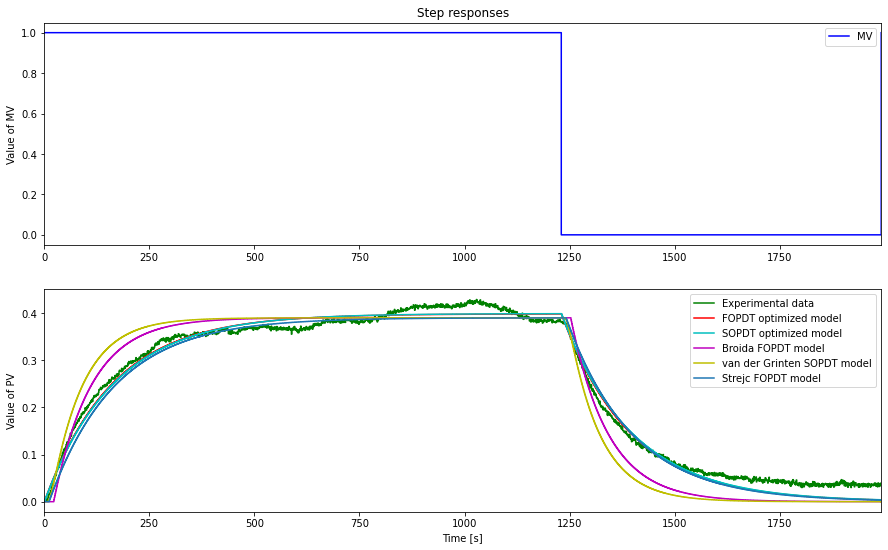

In [16]:
plt.figure(figsize = (15,22))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Step responses')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVm,'g-',label='Experimental data',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVFOPDT,'r-',label='FOPDT optimized model',where='post')

plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'c-',label='SOPDT optimized model',where='post')
plt.legend(loc='best')
plt.xlim([0, TSim])


plt.subplot(2,1,2)
plt.step(t,BroidaPV,'m-',label='Broida FOPDT model',where='post')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,vdGPV,'y-',label='van der Grinten SOPDT model',where='post')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,strejcPV,'-',label='Strejc FOPDT model',where='post')
plt.legend(loc='best')
plt.xlim([0, TSim])

# Frequency analysis

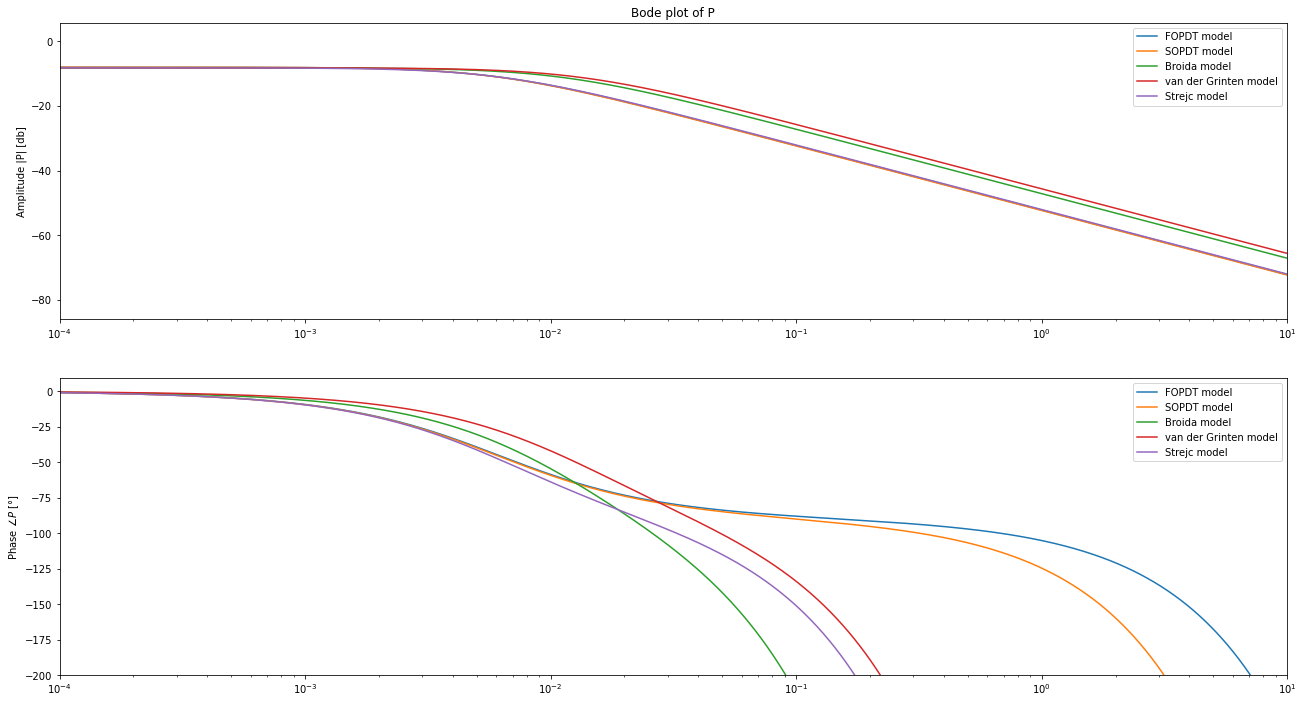

In [14]:
# FOPDT optimized model
P_F = Process({}) # Default process = unit gain
Kp = 0.39830673728121035
T = 162.96308377413766
theta = 0.2712691970121537
P_F.parameters['Kp'] = Kp
P_F.parameters['Tlag1'] = T
P_F.parameters['theta'] = theta

omega = np.logspace(-4, 1, 10000)

Ps_FOPDT = Bode(P_F,omega, Show= False)


############
# SOPDT optimized model
P_S = Process({}) 
Kp = 0.398981565560627
T1 = 165.56685644081972
T2 = 3.645364787323084e-05
theta = 0.6102455489040157
P_S.parameters['Kp'] = Kp
P_S.parameters['Tlag1'] = T1
P_S.parameters['Tlag2'] = T2
P_S.parameters['theta'] = theta

omega = np.logspace(-4, 1, 10000)

Ps_SOPDT = Bode(P_S,omega, Show= False)

###########
# Broida model
P_B = Process({}) 
Kp = 0.39
T = 5.5*(67.75-51.6)
theta = (2.8 * 51.6) - (1.8 * 67.75)

P_B.parameters['Kp'] = Kp
P_B.parameters['Tlag1'] = T
P_B.parameters['theta'] = theta

omega = np.logspace(-4, 1, 10000)

Ps_Broida = Bode(P_B,omega, Show= False)

#############
#van der Grinten model 
P_vdG = Process({}) 

T1 = Tg * ((3*a*e)-1)/(1+a*e)  
T2 = Tg * (1-a*e)/(1+a*e)
theta = Tu - ((T1*T2)/(1+3*T2))

P_vdG.parameters['Kp'] = Kp
P_vdG.parameters['Tlag1'] = T1
P_vdG.parameters['Tlag1'] = T2
P_vdG.parameters['theta'] = theta

Ps_vdG = Bode(P_vdG,omega, Show= False)

###############
a_n = 0.00    # See Table in assignment
b_n = 1.00 
T = Tg/b_n
Tuth = 0
theta = Tu - Tuth

P_St = Process({}) 

P_St.parameters['Kp'] = Kp
P_St.parameters['Tlag1'] = T
P_St.parameters['theta'] = theta

Ps_St = Bode(P_St,omega, Show= False)


###############
name_list = [] 
process_list = []

process_list.append(Ps_FOPDT)
name_list.append("FOPDT model")

process_list.append(Ps_SOPDT)
name_list.append("SOPDT model")

process_list.append(Ps_Broida)
name_list.append("Broida model")

process_list.append(Ps_vdG)
name_list.append("van der Grinten model")

process_list.append(Ps_St)
name_list.append("Strejc model")


Bode_list(process_list,omega, name_list)
